In [2]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
%matplotlib inline


def main():
    # Create a MapQuest open aerial instance.
    map_quest_aerial = cimgt.MapQuestOpenAerial(style='only_streets')

    # Create a GeoAxes in the tile's projection.
    ax = plt.axes(projection=map_quest_aerial.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-22, -15, 63, 65])

    # Add the MapQuest data at zoom level 8.
    ax.add_image(map_quest_aerial, 8)

    # Add a marker for the Eyjafjallajökull volcano.
    plt.plot(-19.613333, 63.62, marker='o', color='yellow', markersize=12,
             alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    plt.text(-19.613333, 63.62, u'Eyjafjallajökull',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
             bbox=dict(facecolor='wheat', alpha=0.5, boxstyle='round'))
    plt.show()

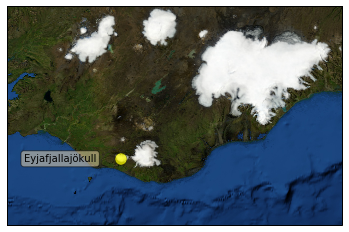

In [3]:
main()

D:\Python27x64\lib\site-packages\PIL\Image.py:860: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
D:\Python27x64\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


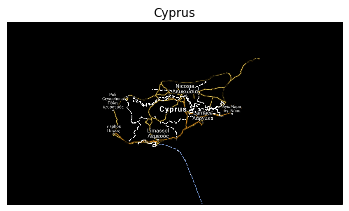

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import img_tiles
%matplotlib inline

tiles_sat = img_tiles.GoogleTiles(style='satellite')
tiles_str = img_tiles.GoogleTiles(style='only_streets')
web_merc = img_tiles.GoogleTiles().crs
img_extent = (31, 35.5, 34, 36)

ax = plt.axes(projection=web_merc)
plt.title('Cyprus')
ax.set_extent([31, 35.5, 34, 36], ccrs.Geodetic())
ax.coastlines(resolution='10m')
#ax.add_image(tiles_sat, 8)
ax.add_image(tiles_str, 8)

plt.show()
